In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [77]:
data=pd.read_excel(r"C:\Users\Lenovo\Desktop\Data_set_1.xlsx")
data.head()

,metal,Zu,Zhou,d,X,r,E,M,rou,Surface,rA,pA,pB,Er,Ea
0,Ru,8,5,7,2.2,1.25,710.0,101.07,12.45,111,CH3CH2CH*,CH3CH2C*,H*,-0.78,0.30
1,Ru,8,5,7,2.2,1.25,710.0,101.07,12.45,111,CH3CCH2*,CH3CCH*,H*,-0.66,0.36
2,Ru,8,5,7,2.2,1.25,710.0,101.07,12.45,111,CH3CH2CH2*,CH3CH2CH*,H*,-0.58,0.36
3,Ru,8,5,7,2.2,1.25,710.0,101.07,12.45,111,CH3CHCH3*,CH3CHCH2*,H*,-0.23,0.41
4,Ru,8,5,7,2.2,1.25,710.0,101.07,12.45,111,CH3CHCH*,CH3CCH*,H*,-0.52,0.50


In [78]:
# from sklearn.preprocessing import OneHotEncoder
# one=OneHotEncoder(sparse=False)
# df1=pd.DataFrame(one.fit_transform(data['metal'].to_numpy().reshape(-1,1)))
# df2=pd.DataFrame(one.fit_transform(data['Surface'].to_numpy().reshape(-1,1)))
# df3=pd.DataFrame(one.fit_transform(data['rA'].to_numpy().reshape(-1,1)))
# df4=pd.DataFrame(one.fit_transform(data['pA'].to_numpy().reshape(-1,1)))
# df5=pd.DataFrame(one.fit_transform(data['pB'].to_numpy().reshape(-1,1)))
df1=pd.get_dummies(data['metal'].to_numpy())
df2=pd.get_dummies(data['Surface'].to_numpy())
df2.columns = df2.columns.astype(str)
df3=pd.get_dummies(data['rA'].to_numpy())
df4=pd.get_dummies(data['pA'].to_numpy())
df5=pd.get_dummies(data['pB'].to_numpy())


In [79]:
from sklearn.preprocessing import StandardScaler
#创建StandardScaler()实例
standard=StandardScaler()
#将DataFrame格式的数据按照每一个series分别标准化
standard_data=standard.fit_transform(data.loc[:,['X','r','E','M','rou',]])
#将标准化后的数据改成DataFrame格式
standard_data_pd=pd.DataFrame(standard_data,columns=['X','r','E','M','rou',])

In [80]:
df_use_2=pd.concat([df2,df3,df4,df5,standard_data_pd,data.loc[:,'Er':'Ea']],axis=1)
df_use_2['Ea']=df_use_2['Ea'].fillna(900)
find=df_use_2[(df_use_2.Ea==900)].index.to_list()
len(find)
df_use_1=df_use_2.iloc[find,:] 
df_use_2=df_use_2.drop(find)
df_use_2.to_csv('./try.csv')
df_use_1

,111,211,CH3CCH,CH3CCH*,CH3CCH2*,CH3CCH3*,CH3CH2C*,CH3CH2CH*,CH3CH2CH2*,CH3CH2CH3,...,CH3CHCH3,CH3CHCH3*,H*,X,r,E,M,rou,Er,Ea
13,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-2.58,900.0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.30,900.0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.73,900.0
16,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.30,900.0
46,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0.562307,-0.304848,-1.078164,-0.714507,-0.693144,-2.17,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,1,0,0,0,0,0,0,1,0,0,...,0,0,1,-1.380169,1.430096,-0.916744,-0.619433,-1.060249,0.20,900.0
254,1,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.380169,1.430096,-0.916744,-0.619433,-1.060249,0.14,900.0
255,1,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.380169,1.430096,-0.916744,-0.619433,-1.060249,1.85,900.0
256,1,0,0,0,0,0,0,0,1,0,...,0,0,1,-1.380169,1.430096,-0.916744,-0.619433,-1.060249,1.78,900.0


In [81]:
df_use=pd.concat([df1,df2,df3,df4,df5,standard_data_pd,data.loc[:,'Er':'Ea']],axis=1)
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ag          258 non-null    uint8  
 1   Au          258 non-null    uint8  
 2   Co          258 non-null    uint8  
 3   Ir          258 non-null    uint8  
 4   Ni          258 non-null    uint8  
 5   Os          258 non-null    uint8  
 6   Pd          258 non-null    uint8  
 7   Pt          258 non-null    uint8  
 8   Re          258 non-null    uint8  
 9   Rh          258 non-null    uint8  
 10  Ru          258 non-null    uint8  
 11  111         258 non-null    uint8  
 12  211         258 non-null    uint8  
 13  CH3CCH      258 non-null    uint8  
 14  CH3CCH*     258 non-null    uint8  
 15  CH3CCH2*    258 non-null    uint8  
 16  CH3CCH3*    258 non-null    uint8  
 17  CH3CH2C*    258 non-null    uint8  
 18  CH3CH2CH*   258 non-null    uint8  
 19  CH3CH2CH2*  258 non-null    u

In [82]:
df_use['Ea']=df_use['Ea'].fillna(900)
find=df_use[(df_use.Ea==900)].index.to_list()
len(find)
df_use=df_use.drop(find)


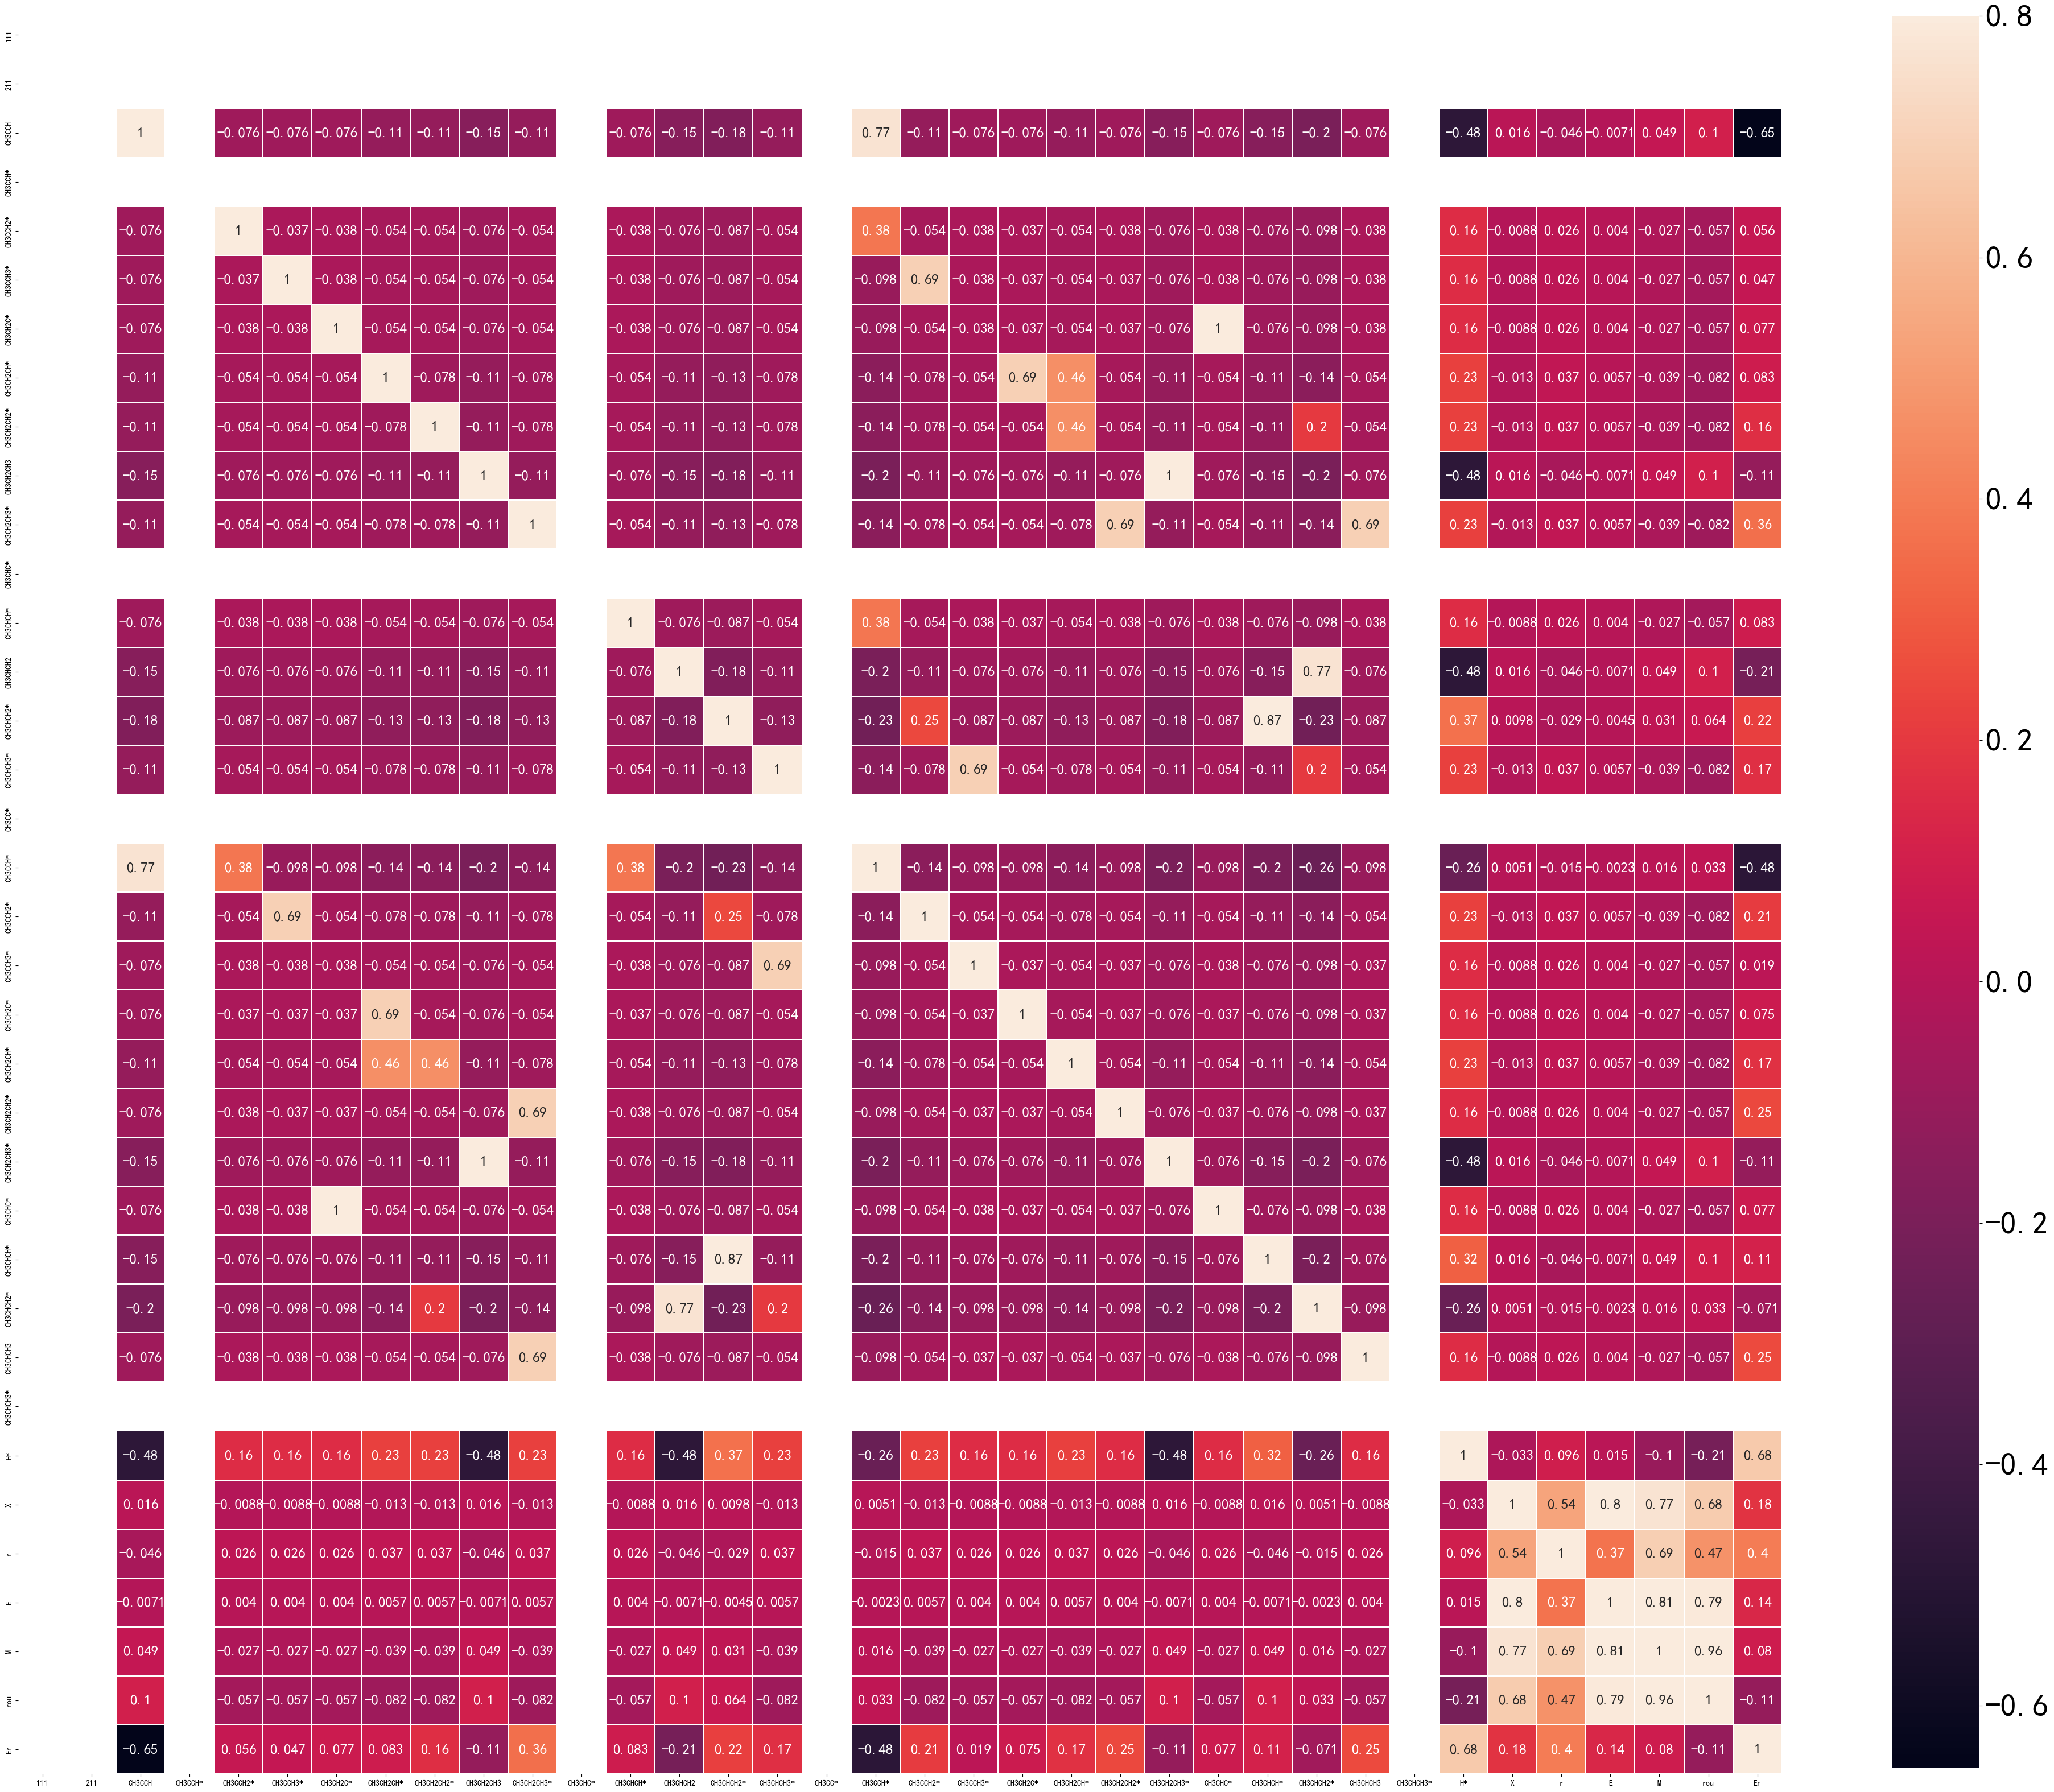

In [83]:
import seaborn as sns
feat=df_use_1.drop(['Ea'],axis=1)
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(feat.corr(method='pearson'),linewidths=0.1,vmax=0.8, square=True,linecolor='white', 
            annot=True,annot_kws={'fontsize':18},cbar=True,cbar_kws={"shrink": 0.8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.title('皮尔逊热力图',fontsize=80)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=40)
plt.show()

In [84]:
df_use_try_2=pd.concat([df2,standard_data_pd,data.loc[:,'Er':'Ea']],axis=1)
df_use_try_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   111     258 non-null    uint8  
 1   211     258 non-null    uint8  
 2   X       258 non-null    float64
 3   r       258 non-null    float64
 4   E       258 non-null    float64
 5   M       258 non-null    float64
 6   rou     258 non-null    float64
 7   Er      258 non-null    float64
 8   Ea      175 non-null    float64
dtypes: float64(7), uint8(2)
memory usage: 14.7 KB


In [85]:
df_use_try_2['Ea']=df_use_try_2['Ea'].fillna(900)
find=df_use_try_2[(df_use_try_2.Ea==900)].index.to_list()
len(find)
df_use_try_2=df_use_try_2.drop(find)

In [86]:
df_use_try_2['111']=df_use_try_2['111'].replace(0,np.nan)
df_use_try_2.info()
df_use_try_2['111']=df_use_try_2['111'].fillna(9000)
find=df_use_try_2[(df_use_try_2['111']==9000)].index.to_list()
len(find)
df_use_try_2=df_use_try_2.drop(find)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 202
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   111     156 non-null    float64
 1   211     175 non-null    uint8  
 2   X       175 non-null    float64
 3   r       175 non-null    float64
 4   E       175 non-null    float64
 5   M       175 non-null    float64
 6   rou     175 non-null    float64
 7   Er      175 non-null    float64
 8   Ea      175 non-null    float64
dtypes: float64(8), uint8(1)
memory usage: 12.5 KB


In [87]:
df_use_try_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 202
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   111     156 non-null    float64
 1   211     156 non-null    uint8  
 2   X       156 non-null    float64
 3   r       156 non-null    float64
 4   E       156 non-null    float64
 5   M       156 non-null    float64
 6   rou     156 non-null    float64
 7   Er      156 non-null    float64
 8   Ea      156 non-null    float64
dtypes: float64(8), uint8(1)
memory usage: 11.1 KB


In [88]:
df_use_try_2.drop(['111','211'],axis=1,inplace=True)

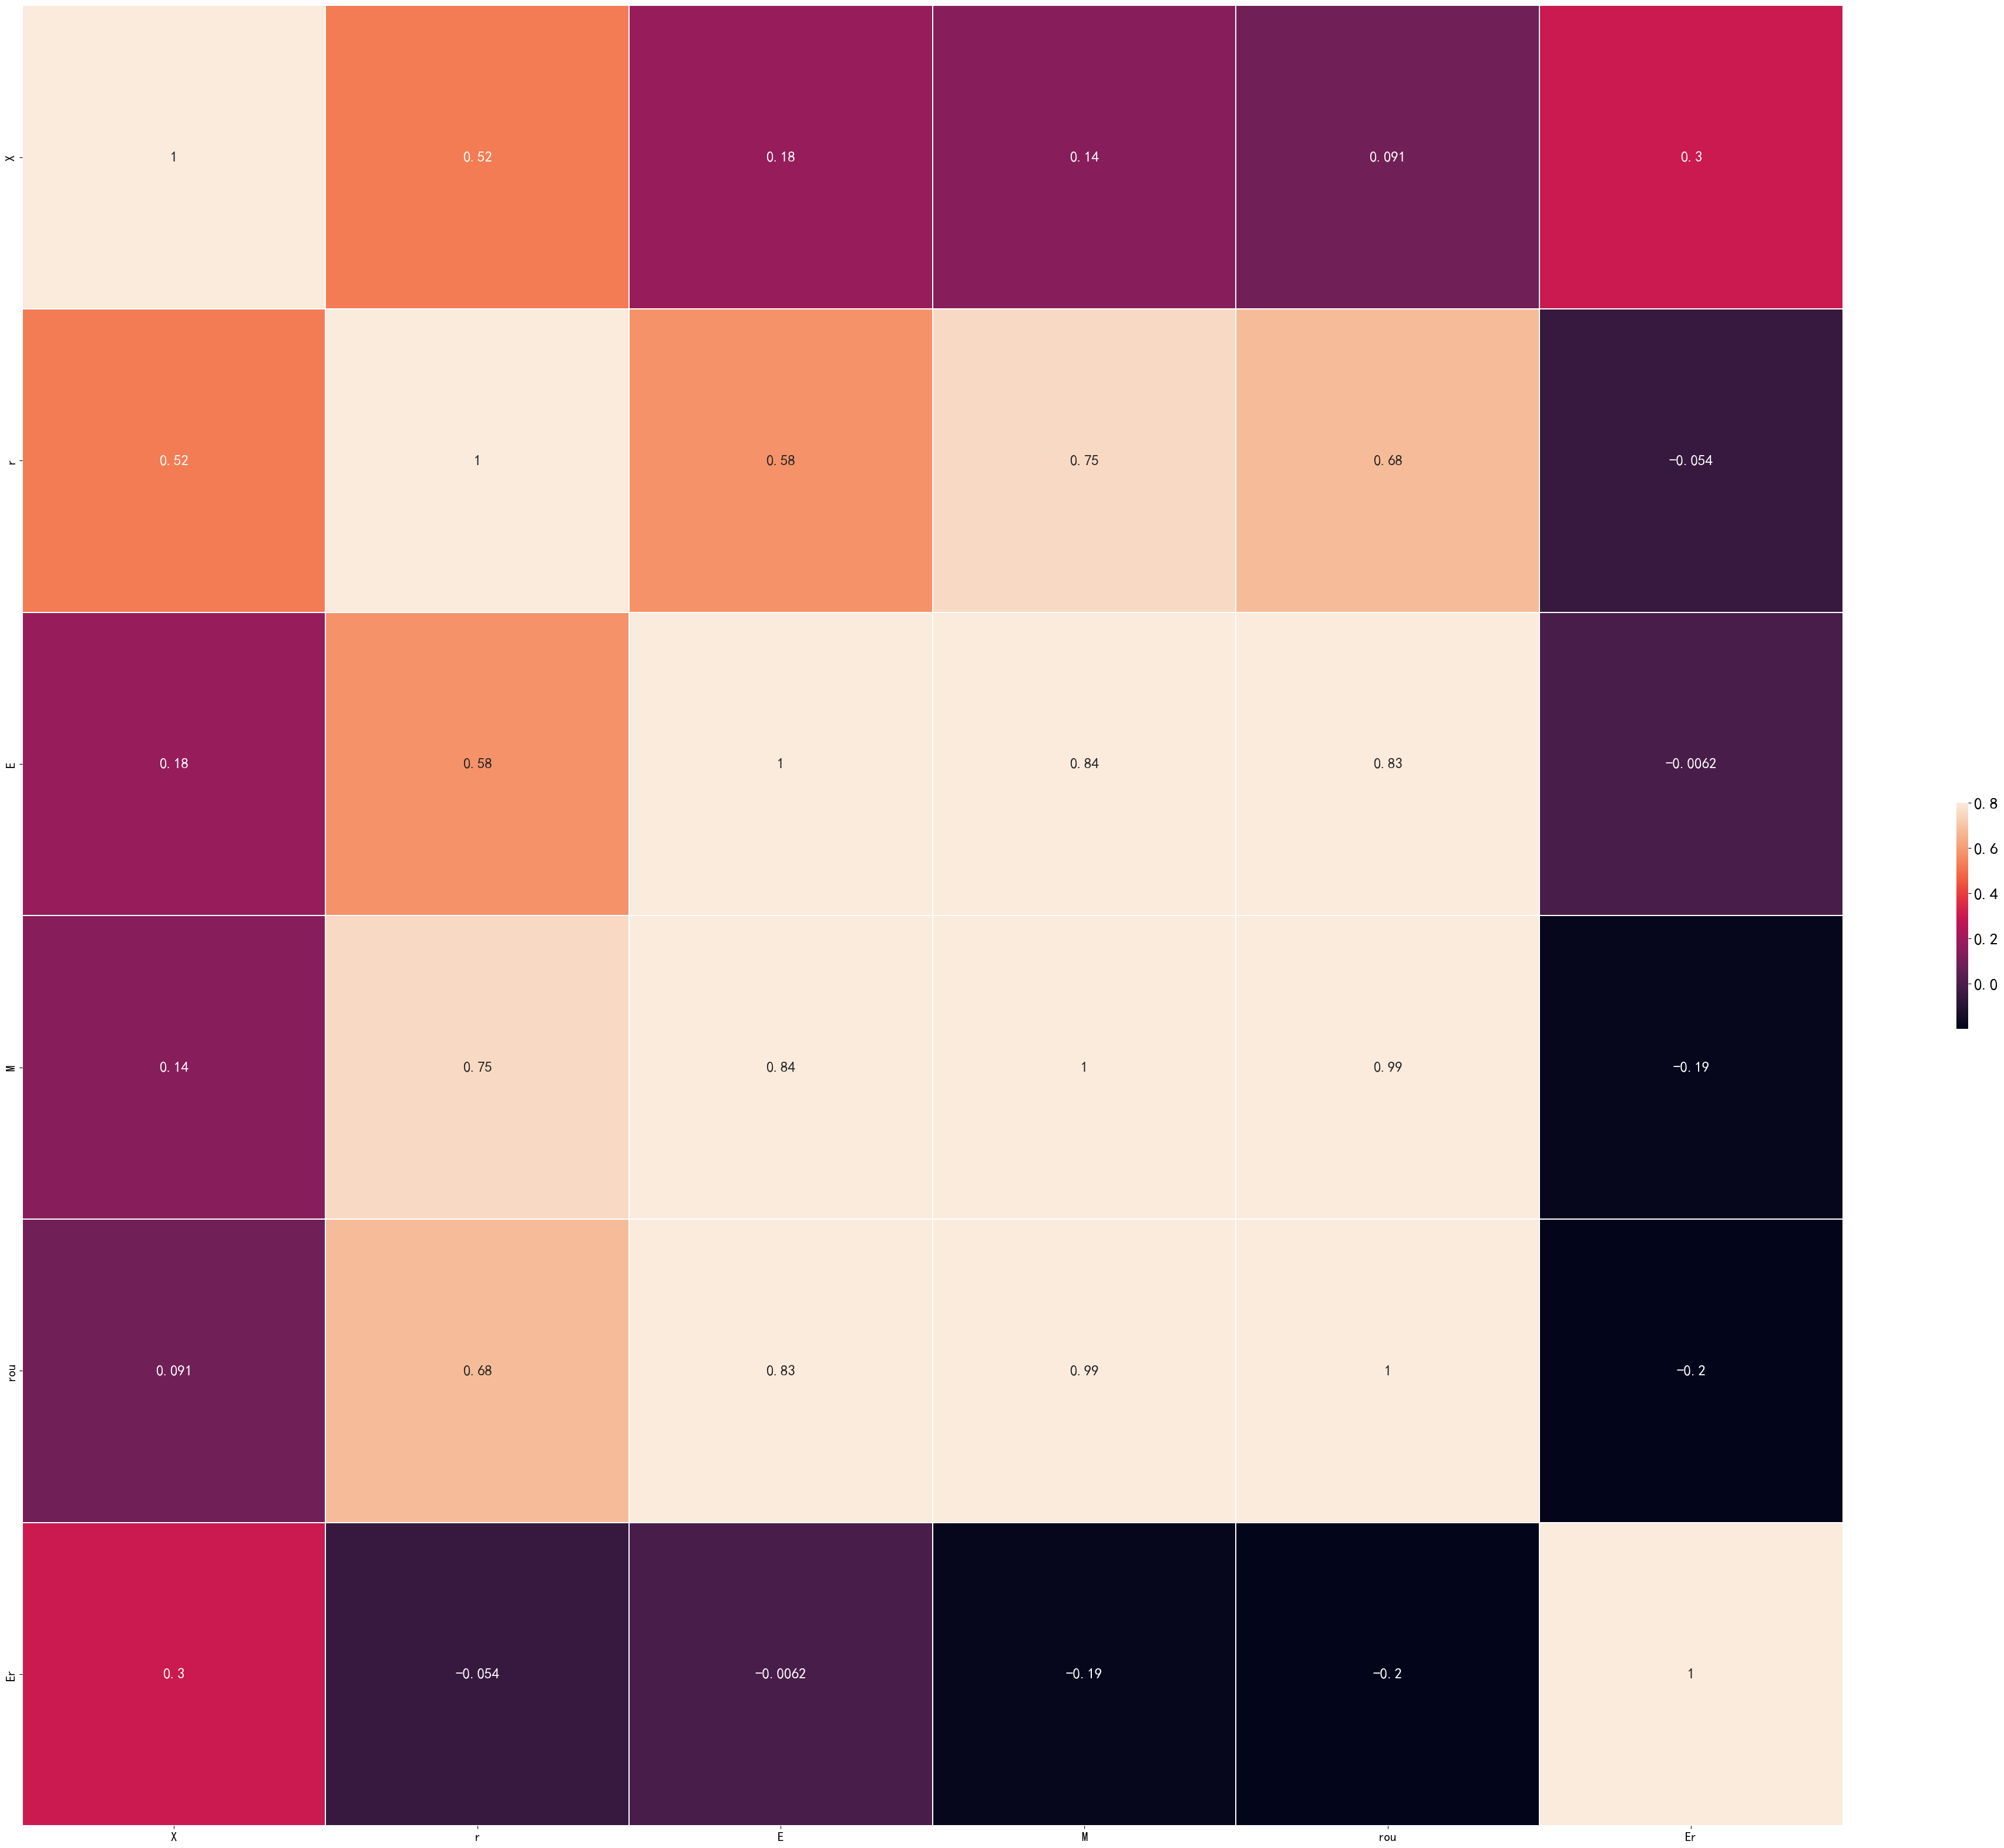

In [89]:
import seaborn as sns
feat=df_use_try_2.drop(['Ea'],axis=1)
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(feat.corr(method='pearson'),linewidths=0.1,vmax=0.8, square=True,linecolor='white', 
            annot=True,annot_kws={'fontsize':18},cbar=True,cbar_kws={"shrink": 0.1})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title('皮尔逊热力图',fontsize=80)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
plt.show()

In [90]:
df_use_try_2

,X,r,E,M,rou,Er,Ea
0,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.78,0.30
1,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.66,0.36
2,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.58,0.36
3,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.23,0.41
4,0.118312,-0.304848,-1.224909,-0.749776,-0.685456,-0.52,0.50
...,...,...,...,...,...,...,...
198,0.118312,0.080695,1.269763,0.997391,1.230796,0.09,0.80
199,0.118312,0.080695,1.269763,0.997391,1.230796,0.05,0.82
200,0.118312,0.080695,1.269763,0.997391,1.230796,0.43,1.02
201,0.118312,0.080695,1.269763,0.997391,1.230796,0.35,1.03


In [91]:
df_use_try_2.to_csv('data_try_2.csv')

In [92]:
df_use_1.to_csv('data_test.csv')

In [93]:
df_use.to_csv('data_use.csv')

In [94]:
from sklearn.model_selection import train_test_split
X=df_use.drop(['Ea'],axis=1)
Y=df_use['Ea']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=11)

In [95]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10, random_state = 1314, shuffle = True)

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(n_estimators=100,
                              max_depth=9,
                              random_state=1314).fit(X=x_train , y=y_train)
r2score = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2').mean()
rmse_score = pow(abs(cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5)
print('r2:',r2score)
print('rmse:',rmse_score)
print('r2:',r2_score(y_train,model.predict(x_train)))
print('MAE:',mean_absolute_error(y_train,model.predict(x_train)))

r2: 0.6891190777690335
rmse: 0.17700386549191027
r2: 0.9582872511386651
MAE: 0.05280055804145986


In [97]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
model = ExtraTreesRegressor(n_estimators=100,
                            max_samples=110,
                            # max_depth=10,
                            bootstrap=True,
                            random_state=1314).fit(X=x_train , y=y_train)
r2_score1 = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2').mean()
rmse_score = pow(abs(cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5)
print('r2:',r2_score1)
print('rmse:',rmse_score)
print('r2:',r2_score(y_train,model.predict(x_train)))
print('MAE:',mean_absolute_error(y_train,model.predict(x_train)))


r2: 0.676926745900841
rmse: 0.18071477564360552
r2: 0.9459793350027682
MAE: 0.061931904761904896


In [98]:
from sklearn.metrics import mean_absolute_error
test_score = model.score(x_test,y_test)
print('测试集得分为：', r2_score(y_test,model.predict(x_test)),mean_absolute_error(y_test,model.predict(x_test)))

测试集得分为： 0.7286885653873361 0.133288761904762


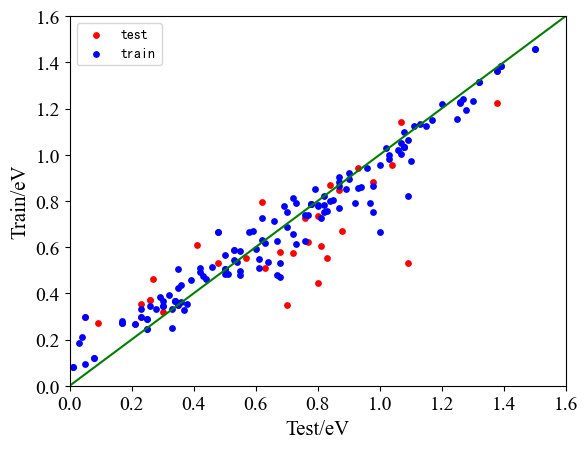

In [99]:
# plt.figure(figsize=(8,6))
plt.scatter(y_test,model.predict(x_test),color='r',s=15,label='test')
plt.scatter(y_train,model.predict(x_train),color='b',s=15,label='train')
plt.xlim((0,1.6))
plt.xlabel('Test/eV',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=14,fontname='Times New Roman')
plt.ylim((0,1.6))
plt.ylabel('Train/eV',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.yticks(fontsize=14,fontname='Times New Roman')
plt.plot([0,1.6],[0,1.6],color='g')
# plt.text(45,92,'XGB',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.legend()
plt.show()

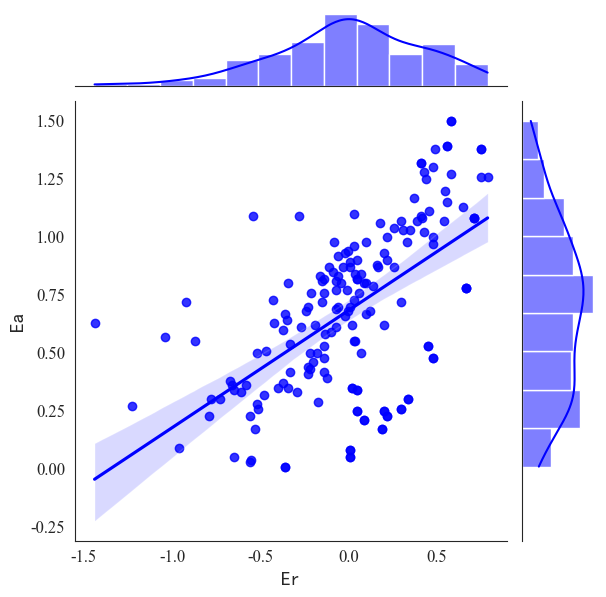

In [104]:
sns.set_style("white",{"font.sans-serif":['simhei','Droid Sans Fallback']})
sns.jointplot(x="Er",y="Ea",data=df_use,kind='reg',color='b')
plt.xlabel('Er',fontsize=14)
plt.ylabel('Ea',fontsize=14)
plt.xticks(fontsize=12,fontname='Times New Roman')
plt.yticks(fontsize=12,fontname='Times New Roman')
plt.show()